In [1]:
import math
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [2]:
# Load ipsilateral and contralateral filter coefficients
ipsi_data = np.loadtxt('ipsi54cm198cm.csv')
cont_data = np.loadtxt('cont54cm198cm.csv')
center = (len(cont_data)-1) // 2

# Load ipsilateral and contralateral filter coefficients
ipsi_data512 = np.loadtxt('ipsi54cm198cm512.csv')
cont_data512 = np.loadtxt('cont54cm198cm512.csv')

In [3]:
def format_coefficient(value):
    """Format the coefficient to align positive and negative values."""
    return f"  {value:.24f}f" if value >= 0 else f" {value:.24f}f"

In [4]:
target_length = 2049
header_filename = "padded"

In [5]:
size = 256
ipsi_data_256 = ipsi_data[center-size:center+size+1]
cont_data_256 = cont_data[center-size:center+size+1]

ipsi_data_padded_256 = np.pad(ipsi_data_256, (0, target_length - len(ipsi_data_256)), mode='constant')
cont_data_padded_256 = np.pad(cont_data_256, (0, target_length - len(cont_data_256)), mode='constant')

print(len(ipsi_data_256))
print(len(cont_data_256))

513
513


In [6]:
size = 128
ipsi_data_128 = ipsi_data[center-size:center+size+1]
cont_data_128 = cont_data[center-size:center+size+1]

ipsi_data_padded_128 = np.pad(ipsi_data_128, (0, target_length - len(ipsi_data_128)), mode='constant')
cont_data_padded_128 = np.pad(cont_data_128, (0, target_length - len(cont_data_128)), mode='constant')

print(len(ipsi_data_128))
print(len(cont_data_128))

257
257


In [7]:
with open(header_filename, "w") as f:
    # Write ipsi filter coefficients
    f.write("const float ipsiCoefs54cm198cmPadded256[TAP_SIZE+1] = \n")
    f.write("{\n")
    f.write(",\n".join(format_coefficient(value) for value in ipsi_data_padded_128))
    f.write("\n};\n\n")

    # Write cont filter coefficients
    f.write("const float contCoefs54cm198cmPadded256[TAP_SIZE+1] = \n")
    f.write("{\n")
    f.write(",\n".join(format_coefficient(value) for value in cont_data_padded_128))
    f.write("\n};\n\n")
    
    # Write ipsi filter coefficients
    f.write("const float ipsiCoefs54cm198cmPadded512[TAP_SIZE+1] = \n")
    f.write("{\n")
    f.write(",\n".join(format_coefficient(value) for value in ipsi_data_padded_256))
    f.write("\n};\n\n")

    # Write cont filter coefficients
    f.write("const float contCoefs54cm198cmPadded512[TAP_SIZE+1] = \n")
    f.write("{\n")
    f.write(",\n".join(format_coefficient(value) for value in cont_data_padded_256))
    f.write("\n};\n\n")

print(f"Header file '{header_filename}' generated successfully.")

Header file 'padded' generated successfully.


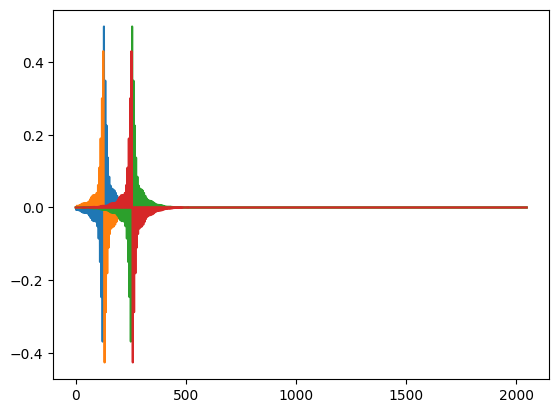

In [8]:
plt.plot(ipsi_data_padded_128)
plt.plot(cont_data_padded_128)
plt.plot(ipsi_data_padded_256)
plt.plot(cont_data_padded_256)